# Stochastic OLG - Introduction to business cycles

Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


**Key Learning Points**

Economics:

* Optimal saving and consumption

* Consumption theory

* General (Walrasian) equilibrium (in OLG setting)

* Representing dynamic equilibrium as a recursive map

Skills:

* Recursive maps

* Stochastic difference equation system

* Python:

    * Programming loops
    * conditional statements
    * working with NumPy arrays 
    * SciPy function for root finding (``brentq``) from ``optimize`` class
    * Defining custom functions (``def``)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as interpolate
import matplotlib.mlab as mlab   # For plotting given distribution functions
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import cm

## Exercise 1 (Diamond OLG model - setup and equilibrium)

Consider the Allais-Samuelson-Diamond OLG model with capital. An agent (born young at date $t \in \mathbb{N}$) consumes $c_{y,t}$ when young and $c_{o,t+1}$ when old. There is an infinite set of such agents on the interval $[0,1]$. Assume that the population of young agent remains constant at size $1$ each period. The date-$t$ young agent has a preference ordering over $(c_{y,t}, c_{o,t+1})$ streams which is represented by the felicity function:
$$
    U(c_{y,t},c_{o,t+1}) = \ln(c_{y,t}) + \beta \ln(c_{o,t+1}),
$$
where $\beta > 0$. The sequence of budget constraints for the agent is:
$$
    c_{y,t} + s_{t} = w_{t} \times 1,
$$
and,
$$
    c_{o,t+1} = R_{t}s_{t},
$$
where $s_{t}$ is savings flow, $w_{t}$ and $R_{t}-1$, respectively, are competitive equilibrium real rental rates on labor and capital.

Capital is assumed to depreciate fully in each period. Total saving in the economy, $s_{t} \times 1$, equals new capital next period: $k_{t+1} = s_{t}$. 

Let $k$ denote the capital-to-labor ratio, $(A,k) \mapsto f(A,k)$ is the production function, and $(A,k) \mapsto f_{k}(A,k)$ is its first-order derivative function (with respect to $k$). Instantiate $f$ by $f(A_{t}, k_{t}) = A_{t}k_{t}^{\alpha}$. The firm is perfectly competitive in both its product market and its factor input (capital and labor rental) market, and maximizes profits.

1. Write down each generation's ex-ante decision problem and characterize their optimal behavior.
1. Do the same for the firm.
1. Define a recursive (dynamic) competitive equilibrium (list quantities and prices, and write down their corresponding demand/supply and market clearing conditions).

## Answers

**Part 1**. The answers were done live in class last week! You can set this up as a Lagrange problem or simply substitute in the constraints and maximize over the choice variable $s_{t}$. The optimal consumption/savings functions, given market prices---$(w_{t}, R_{t})$ measured in units of the final consumption good)---are solutions to the necessary and sufficient conditions (why *and*?):
$$
\left(\frac{1}{c_{y,t}}\right) = \beta \left( \frac{1}{c_{o,t+1}} \right) R_{t+1},
$$ 
and,
$$
c_{y,t} + s_{t} = w_{t} \times 1,
$$
and also,
$$
    c_{o,t+1} = R_{t+1}s_{t}.
$$
Trivia: Can you interpret in words, the economic meaning of these conditions, especially the first one?

Remark: You still to solve out for the savings supply function. Use the budget constraints.



**Part 2**. In general if capital *services* (note this is not capital *stock* -- What is the difference?) used each period involve depreciation at rate $\delta$ per period, then the firm's market rental rate should take that into account. That is, for each unit of $K_t$ service flow rented, the firm's marginal hiring cost in the capital rental market is $R_t -1 +\delta$. Its marginal hiring cost for labor services is $w_t$. We can normalize the final good's price to unity. So these rental rates are then measured in relative terms, in units of the final good.

The representative firm's profit maximization problem is then given by:

$$ 
    \max_{K_t, L_t} F(K_t, L_t) - w_tL_t - (R_t - 1 + \delta) K_t \text{}
$$ 

The FOCs are given by:


$$
     F_{K} (A, K_t, L_t) = R_t - 1 + \delta =  R_t 
$$

and,

$$
     F_{L} (A, K_t, L_t) = w_t.
$$

Note that in this question, we assumed $\delta = 1$.

Applying the Cobb-Douglas instance of $F$:

$$
    R_t = f_{k} (A,k) = \alpha A_t k_t ^{\alpha -1},
$$

and,

$$
    w_t = f(k_t) - f_k(A,k)k_t = A_t k_{t}^{\alpha}  - \alpha A_t k_{t}^{\alpha - 1}k_{t} = (1- \alpha) A_t k_{t}^{\alpha}
$$

The last two conditions are a consequence of the production function being homogeneous of degree one: Given $f(k_t)$, and $k_t = \frac{K_t}{L_t}$, we multiply the production function (in intensive form) by the stock of labour at time $t$ to get the production function we are familiar with:

$$
    L_{t}f(A, k_t) = L_{t}F(A, k_t, 1)= L_{t}F\left( A, \frac{K_t}{L_t}, 1 \right) = F(A, K_t, L_t)
$$

**Part 3**. So, give it all a good algebraic jiggle, you should have a version of the following (concise) definition of Walrasian equilibrium:  Given an initial state $k_{0}$, a *(recursive) competitive (general) equilibrium* in this model is an infinite sequence (allocation) $\{k_{t+1}\}_{t=0}^{\infty}$ and a pricing system $\{w_{t}, R_{t}\}_{t=0}^{\infty}$ satisfying these conditions:

$$
w_{t} = (1 − \alpha) A k_{t}^{\alpha}, 
$$
and,
$$
R_{t} = \alpha A k_{t}^{\alpha-1},
$$
and also,
$$
k_{t+1} = \frac{\beta (1-\alpha)}{1+\beta} A k_{t}^{\alpha}.
$$

What do they represent (in words?)

## Exercise 2 (Diamond OLG model - computer demo by tutor)

Follow up from the last exercise. Now, let $\alpha = 0.33$, $\beta = 1.0/(1.0+0.04^{35})$, and $A_{t} = 1.0$. Calculate the (nontrivial) steady state value of $k>0$.
4. Pick an initial $k_{0} < k$. Compute the economy's dynamic equilibrium outcome in terms of the variable $k_{t}$ beginning from your chosen $k_{0}$ for $T = 100$ periods.
4. Now suppose $\ln(A_{t})$ follows the AR(1) model from last week's Tutorial. Then future consumption becomes a random variable. Define the agents' payoff function now as a von-Neumann-Morgenstern expected utility:
$$
    U(c_{y,t},c_{o,t+1}) = \mathbb{E} \left\{ \ln(c_{y,t}) + \beta \ln(c_{o,t+1}) | A_{t} \right\}.
$$ 
    Re-define the competititive equilibrium for this stochastic economy. Compute a sample dynamic equilibrium outcome in terms of the variable $k_{t}$.

**Part 4**. Let's work through this step by step, ballroom dancing style!

*Step 1*. Instantiate model parameters. 

    Remember, just like doing a logical proof (or baking a flan) you can't give the right instructions if parameters are not defined beforehand (or if you don't have eggs). 

In [2]:
# Parameters of special-case Diamond OLG model
ALPHA = 0.33
BETA = 1.0/(1.0+0.04**35.)
A = 1.0

*Step 2*. This example was a combination of analytical characterizations and now, numeric solution. 

So now, we take what we derived as the crucial description of equilibrium -- the *recursive equilibrium map*. 

We code this up as a re-usable function or ``def`` since we will evaluate this repeatedly to generate equilibrium *outcomes* or the equilibrium trajectory of this model economy:

In [3]:
# Define the dynamic equilibrium (i.e., RCE) map
def h(k, A):
    """Special case Diamond OLG RCE transition function"""
    konstant = BETA*(1.0-ALPHA)/(1.0+BETA)
    return konstant*A*(k**ALPHA)

We'll solve for the steady state equilibrium (in terms of $k$) numerically. (In this example, you could have just done this by hand!)

In [4]:
def g(k, A):
    return h(k, A) - k
kss = opt.brentq(g, 1e-20, 20.0, args=(A,))
# Check visually
print("Strictly positive steady-state kss =%6.3f" %(kss))

Strictly positive steady-state kss = 0.195


*Step 3*. Here we have a scalar dynamical system. It is possible to graph the recursive equilibrium map in a phase diagram.

This picture depicts a similar mechanics as in the Solow-Swan model.

The equilibrium map from $k_{t}$ to $k_{t+1}$ is increasing, continuous and strictly concave. Why?

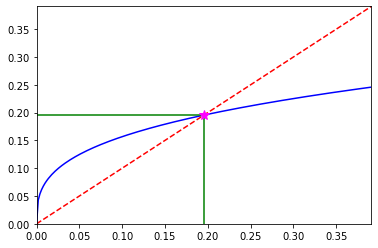

In [5]:
kmax = kss*2.0
X = np.linspace(0., kmax, 200)
kssline = np.linspace(0.,kss,2)
ksstile = np.tile(kss,2)
# Figure
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(X.min(), X.max()), 
              ylim=(X.min(), X.max()))
ax.plot(X, h(X, A), '-b', 
        X, X, '--r', 
        ksstile, kssline, '-g', 
        kssline, ksstile, '-g',
        label='Equilibrium map'
       )
ax.plot(kss, kss, $
    U(c_{y,t},c_{o,t+1}) = \mathbb{E} \left\{ \ln(c_{y,t}) + \beta \ln(c_{o,t+1}) | A_{t} \right\}.
$$ 
            marker='*', 
            color='magenta', 
            markersize='10')
plt.show()

*Step 4*. Observe that we really only need to worry about solving the (last) autonomous difference equation, which has the recursive form $k_{t+1} = h(A_t, k_t)$, from part 2 above. Note that in the deterministic case, $A_{t} = A$ is a constant.

Everything else can be backed out once we have the allocation in terms of $k$. 

I think you can take it from here on with just a little bit more garam masala added.

In [6]:
def simulate_olg(k_init=0.01, A_init=A, T=100):
    """Simulate deterministic OLG model"""
    # Pre-allocate storage array: known T-length simulated trajectory
    kpath = np.empty(T)
    # Kickstart: initial state, store it for use next
    kpath[0] = k_init
    # A is constant: tile (copy) it T times
    Apath = np.tile(A_init, T)
    # Evaluate equilibrium outcomes: Iterate on recursive equilibrium map 
    for t in range(T-1):
        kpath[t+1] = h(kpath[t], Apath[t])
    return kpath, Apath

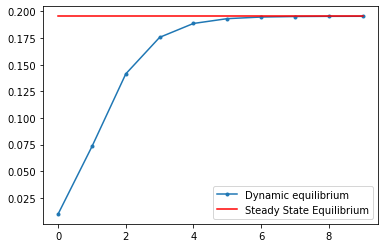

In [7]:
# Generate simulation instance
Horizon = 10
ksim, Asim = simulate_olg(T=Horizon)

# Plot figure of simulated equilibrium path
fig = plt.figure(facecolor='white')
x = range(ksim.size)
y = ksim
plt.plot(x, ksim, 
             '.-', 
             label='Dynamic equilibrium') 
plt.plot(x, np.tile(kss, Horizon), 
         '-r', 
         label='Steady State Equilibrium') 
plt.legend()
plt.show()

## Exercise 3 (stochastic case)

**Part 5**. Since the per-period utility functions are logarithmic and linearly separable, you can show that the equilibrium characterization is just the same as before, except that now, $A$ is a random variable where $\ln(A_{t})$ follows an AR(1) stochastic process:

$$
\ln(A_{t+1}) = \rho \ln(A_{t}) + \epsilon_{t+1},
$$

where $\epsilon_{t}$ is independently and identically distributed (i.i.d.) according to a a Normal distribution $N(0,\sigma^{2})$.

In [8]:
def ar1(y, RHO=0.8, SIGMA=0.05):
    """Define AR(1) model"""
    return RHO*y + SIGMA*np.random.randn()

def simulate_stochastic_olg(k_init=0.01, a_init=1.0, T=100):
    """Simulate determinstic or stochastic OLG model (special case)"""
    kpath = np.empty(T)
    kpath[0] = k_init
    apath = kpath.copy()
    apath[0] = a_init
    for t in range(T-1):
        # log(A) process
        apath[t+1] = ar1(apath[t])
        # RCE map
        kpath[t+1] = h(kpath[t], np.exp(apath[t]))
    return kpath, apath

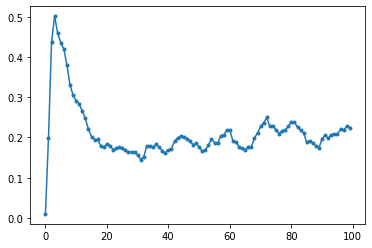

In [9]:
# Invoke a stochastic simulation instance
kmonty, Amonty = simulate_stochastic_olg()
# Figure
fig = plt.figure(facecolor='white')
plt.plot(kmonty, '.-')
plt.show()

In [10]:
# Other variables
def outcomes_rce(kpath, Apath):
    Apath = np.exp(Apath)
    w = (1.0-ALPHA)*Apath*kpath**ALPHA
    R = ALPHA*Apath*kpath**(ALPHA-1.0)
    cnow = w - kpath
    cnext = R[1::]*kpath[1::]
    y = Apath*kpath**ALPHA
    # Store as dictionary
    out = {"Capital":kpath,
           "Wage Rate":w, 
           "Gross Return":R, 
           "Young Consumption":cnow, 
           "Old Consumption":cnext, 
           "Output":y
           }
    return out

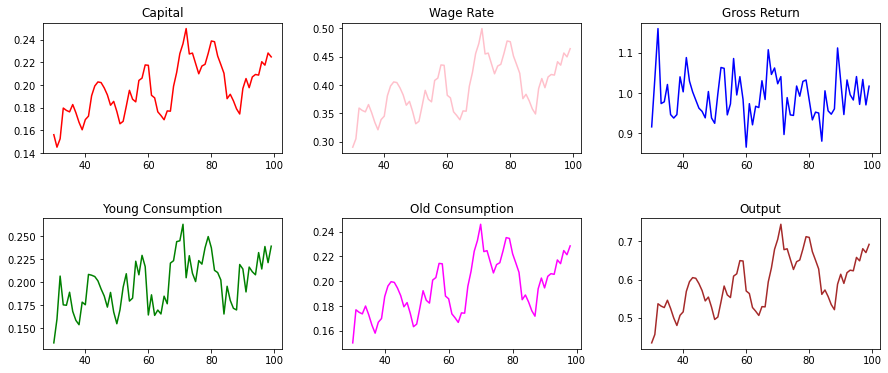

In [11]:
# Discard earlier simulations to avoid initial effects
burn = 30
# Evaluate all RCE functions to get outcomes
rceout = outcomes_rce(kmonty, Amonty)
# Visualize them
fig, axes = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.25)
axes = axes.ravel()  
col = ["red", "pink", "blue", "green", "magenta", "brown"]
for panel, (key, value) in enumerate(rceout.items()):
    y = value[burn::]
    x = np.arange(y.size) + burn
    axes[panel].plot(x, y, color=col[panel])
    axes[panel].set_title(key)

## Exercise 3 (CRRA preference)

Now, think about how you might solve a more general version of the above stochatic OLG model. Assume instead that preferences are

$$
    U(c_{y,t},c_{o,t+1}) = \mathbb{E} \left\{ u(c_{y,t}) + \beta u(c_{o,t+1}) | A_{t} \right\},
$$ 

where,

$$
u(x) = \lim_{\tilde{\sigma}\rightarrow\sigma}\frac{x^{1-\tilde{\sigma}} -1}{1-\tilde{\sigma}}.
$$

Numerically, assume $\sigma = 2.0$.

Hint: You will need to use a numerical root-finding method as described in the companion notebook.